In [2]:
import numpy as np
import pandas as pd
import fine_tuning

### Training language and general setup

In [3]:
data_path = "../data/sentiment/"
task = "sentiment"
short_model_name = input("Short model name: ")
experiment = input("Experiment: ")
checkpoints_path = "E:/TFM_CCIL/checkpoints_experimental/"
use_class_weights = bool(int(input("Use class weights (1/0): ")))
print("\n")
        
#training_lang = fine_tuning.get_global_training_state(data_path, short_model_name, experiment, checkpoints_path)
training_lang = "he"
trainer = fine_tuning.Trainer(training_lang, data_path, task, short_model_name, use_class_weights)

Short model name: xlm-roberta
Experiment: acl
Use class weights (1/0): 1




### Model setup

In [4]:
# Model parameters
max_length = 256
batch_size = 8
learning_rate = 2e-5
epochs = 30

# Model creation
trainer.build_model(max_length, batch_size, learning_rate, epochs, num_labels=2, eval_batch_size=64)

# Checkpoint for best model weights
trainer.setup_checkpoint(checkpoints_path)

Some weights of the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFXLMRobertaForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFXLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at jplu/tf-xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully built tf-xlm-roberta-base
Checkpoint file: E:/TFM_CCIL/checkpoints_experimental/he/tf-xlm-roberta-base_sentiment_checkpoint_classweights.hdf5
Temp weights file: E:/TFM_CCIL/checkpoints_experimental/he/tf-xlm-roberta-base_temp.hdf5


### Data preparation

In [5]:
limit = None
train_eval_subsample = None
train_subsample = 500

trainer.prepare_data(limit=limit, train_eval_subsample=train_eval_subsample, train_subsample=train_subsample)

print("Train examples:", trainer.train_data.shape[0])
if trainer.use_class_weights:
    trainer.calc_class_weights()
    print(trainer.class_weights)

e:\anaconda\envs\tfm_ccil\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Train examples: 500
{0: 1.8518518518518519, 1: 0.684931506849315}


### Training

Elapsed:                 0:38:52                  
Estimated remaining:     0:00:00                  



History:

Best dev score so far: 0.8518

Epoch               Loss                Train score         Dev score           
0                   0.6329              0.8031              0.7609              
1                   0.4236              0.8704              0.7838              
2                   0.3889              0.9381              0.8046              
3                   0.5684              0.7523              0.7141              
4                   0.6085              0.7796              0.7653              
5                   0.4684              0.8199              0.7958              
6                   0.4102              0.8492              0.7872              
7                   0.3243              0.9161              0.8007              
8                   0.2439              0.9343              0.8329              
9                   0.1654              0.9510              0.8164              
10                  0.1392              0.9422              0.8184 

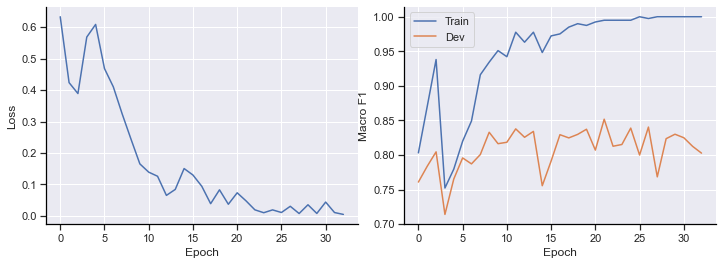

In [7]:
trainer.setup_training(load_previous_checkpoint=True)
trainer.train()

Make best checkpoint definitive

In [8]:
trainer.compare_checkpoint()
command = input("\nChoose action:\n0.Make definitive\n1.Delete\n")
if command == "0":
    trainer.make_definitive()
elif command == "1":
    trainer.delete_checkpoint()

Current dev score: 0.8518

Weight files found:

E:/TFM_CCIL/checkpoints_experimental/he\tf-xlm-roberta-base_sentiment_checkpoint_classweights.hdf5

No better weights found.

Choose action:
0.Make definitive
1.Delete
0
